In [42]:
# Importaciones
import cv2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image


# Problema 1

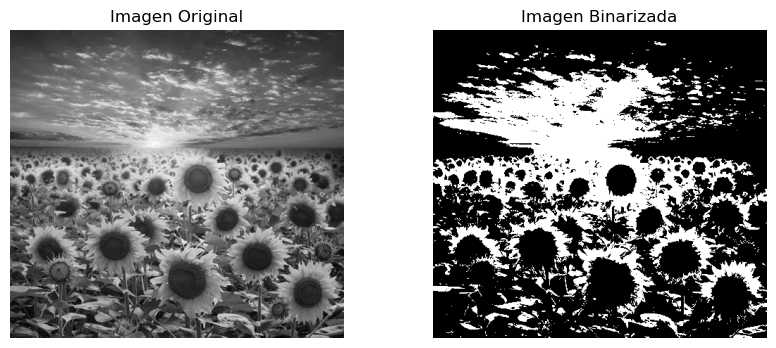

La imagen fue binarizada correctamente y guardada como 'imagen_binarizada.png'.


In [5]:
def binarizar_imagen(ruta_imagen, umbral=128):
    # Verificar si la ruta es válida y si el archivo existe
    if not isinstance(ruta_imagen, str) or not os.path.exists(ruta_imagen):
        print("Error: La ruta proporcionada no es válida o el archivo no existe.")
        return None

    # Cargar la imagen en escala de grises
    imagen_gris = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    
    # Verificar si la imagen se cargó correctamente
    if imagen_gris is None:
        print("Error: No se pudo cargar la imagen. Verifique la ruta.")
        return None
    
    # Aplicar la binarización utilizando el umbral
    _, imagen_binarizada = cv2.threshold(imagen_gris, umbral, 255, cv2.THRESH_BINARY)
    
    # Mostrar la imagen original y la imagen binarizada usando matplotlib
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Imagen Original")
    plt.imshow(imagen_gris, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Imagen Binarizada")
    plt.imshow(imagen_binarizada, cmap='gray')
    plt.axis('off')

    plt.show()
    
    # Guardar la imagen binarizada en un archivo
    cv2.imwrite("Problema1/imagen_binarizada.png", imagen_binarizada)
    
    return imagen_binarizada

# Ejemplo de uso
binary_image = 'Problema1/e1.jpeg'
imagen_binarizada = binarizar_imagen(binary_image)

# Verificar si la binarización se realizó correctamente
if imagen_binarizada is not None:
    print("La imagen fue binarizada correctamente y guardada como 'imagen_binarizada.png'.")
else:
    print("Hubo un problema al intentar binarizar la imagen.")

# Problema 2

In [9]:
def preprocess_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Binarize the image (convert to black and white)
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    
    return binary_image


In [11]:
def apply_operations(image1, image2):
    # Ensure the images have the same size
    image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
    
    # SUMA
    suma = cv2.add(image1, image2)
    
    # RESTA
    resta = cv2.subtract(image1, image2)
    
    # AND
    and_op = cv2.bitwise_and(image1, image2)
    
    # OR
    or_op = cv2.bitwise_or(image1, image2)
    
    # XOR
    xor_op = cv2.bitwise_xor(image1, image2)
    
    return suma, resta, and_op, or_op, xor_op


In [13]:
def save_results(results):
    operation_names = ['SUMA', 'RESTA', 'AND', 'OR', 'XOR']
    for i, result in enumerate(results):
        cv2.imwrite(f'Problema2/result_{operation_names[i]}.png', result)
    print("Images have been saved successfully.")



In [29]:
def display_images():
    operation_names = ['SUMA', 'RESTA', 'AND', 'OR', 'XOR']
    for operation in operation_names:
        image_path = f'Problema2/result_{operation}.png'
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(5, 5))
        plt.imshow(image_rgb)
        plt.title(f'Resultado de {operation}')
        plt.axis('off')
        plt.show()

In [31]:
def main(image_path1, image_path2):
    image1 = preprocess_image(image_path1)
    image2 = preprocess_image(image_path2)
    
    results = apply_operations(image1, image2)
    
    save_results(results)
    display_images()


Images have been saved successfully.


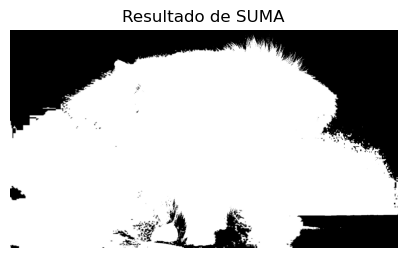

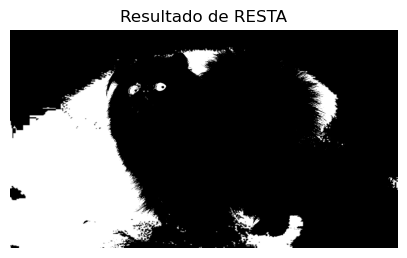

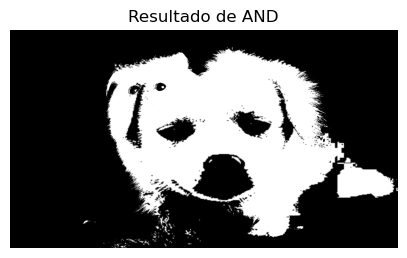

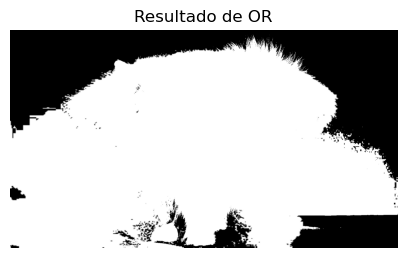

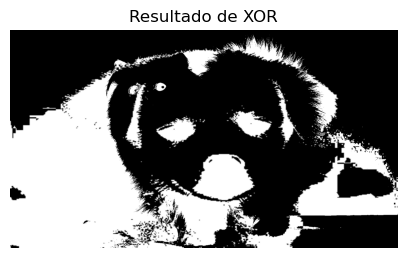

In [33]:
main('Problema2/e21.jpeg', 'Problema2/e22.jpg')


# Problema 3

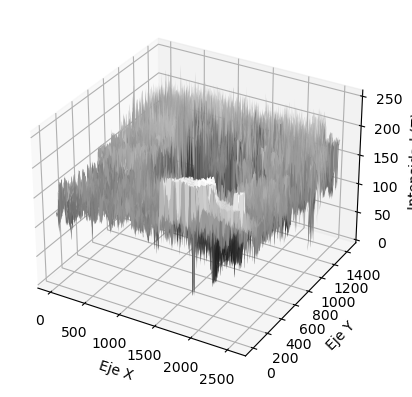

In [72]:
def mostrar_imagen_3d(imagen_gris_path):
    # Cargar la imagen en escala de grises utilizando cv2
    imagen_gris = cv2.imread(imagen_gris_path, cv2.IMREAD_GRAYSCALE)
    
    # Verificar que la imagen se haya cargado correctamente
    if imagen_gris is None:
        raise ValueError(f"No se pudo cargar la imagen desde la ruta: {imagen_gris_path}")
    
    # Crear las coordenadas X, Y
    x = np.arange(0, imagen_gris.shape[1])
    y = np.arange(0, imagen_gris.shape[0])
    x, y = np.meshgrid(x, y)
    
    # Crear la figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Dibujar la superficie
    ax.plot_surface(x, y, imagen_gris, cmap='gray')
    
    # Etiquetas de los ejes
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad (Z)')
    
    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso con una imagen en escala de grises
mostrar_imagen_3d('Problema3/e31.jpeg')

# Problema 4

In [46]:
def transformacion_negativa_cv2(imagen):
    return cv2.bitwise_not(imagen)  # Inversión de los valores de los píxeles

In [49]:
def transformacion_lineal_cv2(imagen, a=1.0, b=0):
    imagen_transformada = cv2.convertScaleAbs(imagen, alpha=a, beta=b)
    return imagen_transformada


In [51]:
def transformacion_logaritmica_cv2(imagen, c=1):
    imagen_log = c * np.log1p(imagen.astype(np.float64))  # log1p es log(1 + imagen) para evitar log(0)
    imagen_transformada = cv2.normalize(imagen_log, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(imagen_transformada)


In [61]:
def transformacion_exponencial_cv2(imagen, c=1, gamma=1.0):
    imagen_normalizada = imagen / 255.0  # Normalizar los valores de la imagen
    imagen_transformada = c * np.power(imagen_normalizada, gamma)
    imagen_transformada = cv2.normalize(imagen_transformada, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(imagen_transformada)


In [55]:

def mostrar_imagen_cv2(imagen, titulo='Imagen'):
    plt.figure(figsize=(6, 6))
    plt.imshow(imagen, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

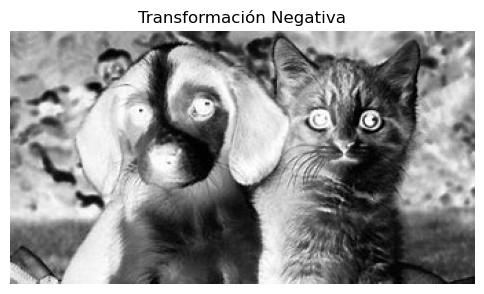

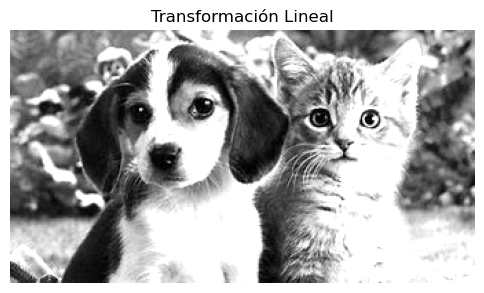

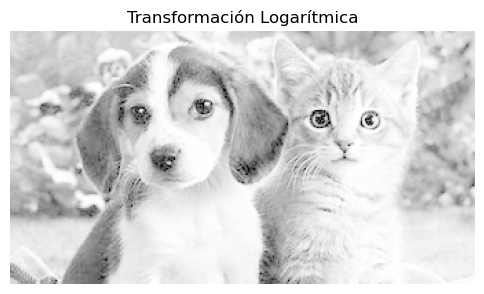

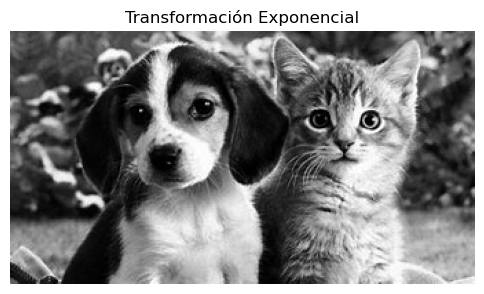

In [74]:
def cargar_imagen_gris_cv2(ruta):
    return cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

def guardar_imagen_cv2(imagen, ruta_guardar):
    cv2.imwrite(ruta_guardar, imagen)

# Cargar imagen
imagen_gris = cargar_imagen_gris_cv2('Problema4/e41.jpeg')

# Aplicar transformaciones
imagen_negativa = transformacion_negativa_cv2(imagen_gris)
imagen_lineal = transformacion_lineal_cv2(imagen_gris, a=1.2, b=30)
imagen_logaritmica = transformacion_logaritmica_cv2(imagen_gris, c=50)
imagen_exponencial = transformacion_exponencial_cv2(imagen_gris, c=1, gamma=1.2)

# Guardar resultados
guardar_imagen_cv2(imagen_negativa, 'Problema4/imagen_negativa.png')
guardar_imagen_cv2(imagen_lineal, 'Problema4/imagen_lineal.png')
guardar_imagen_cv2(imagen_logaritmica, 'Problema4/imagen_logaritmica.png')
guardar_imagen_cv2(imagen_exponencial, 'Problema4/imagen_exponencial.png')

# Mostrar imágenes en JupyterLab
mostrar_imagen_cv2(imagen_negativa, 'Transformación Negativa')
mostrar_imagen_cv2(imagen_lineal, 'Transformación Lineal')
mostrar_imagen_cv2(imagen_logaritmica, 'Transformación Logarítmica')
mostrar_imagen_cv2(imagen_exponencial, 'Transformación Exponencial')

# Problema 5

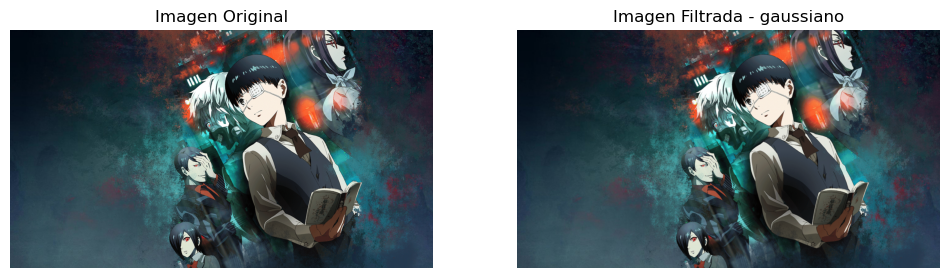

In [78]:
def aplicar_filtro_convolucion(imagen_path, kernel_tipo='gaussiano', kernel_size=3):
    # Cargar la imagen a color
    imagen = cv2.imread(imagen_path)
    
    # Verificar que la imagen se haya cargado correctamente
    if imagen is None:
        raise ValueError(f"No se pudo cargar la imagen desde la ruta: {imagen_path}")
    
    # Definir el kernel según el tipo y tamaño
    if kernel_tipo == 'gaussiano':
        kernel = cv2.getGaussianKernel(kernel_size, 0)
        kernel = np.outer(kernel, kernel)
    elif kernel_tipo == 'sobel':
        if kernel_size == 3:
            kernel = cv2.getDerivKernels(1, 0, 3)[0] @ cv2.getDerivKernels(1, 0, 3)[1].T
        else:
            raise ValueError("Sobel solo soporta kernel de 3x3")
    elif kernel_tipo == 'sharp':
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    elif kernel_tipo == 'unsharp':
        kernel = -1 * np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, -476, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]]) / 256
    elif kernel_tipo == 'laplaciano':
        kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    else:
        raise ValueError(f"Tipo de kernel desconocido: {kernel_tipo}")
    
    # Aplicar el filtro de convolución
    imagen_filtrada = cv2.filter2D(imagen, -1, kernel)
    
    # Mostrar la imagen original y la imagen filtrada
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagen_filtrada, cv2.COLOR_BGR2RGB))
    plt.title(f'Imagen Filtrada - {kernel_tipo}')
    plt.axis('off')
    
    plt.show()

# Ejemplo de uso
aplicar_filtro_convolucion('Problema5/e51.jpg', kernel_tipo='gaussiano', kernel_size=3)

# Problema 6

### Qué hace el kernel Laplaciano:

El kernel Laplaciano es un operador que se utiliza en procesamiento de imágenes para detectar áreas donde la intensidad de los píxeles cambia abruptamente, lo que es indicativo de la presencia de bordes en la imagen. Este operador calcula la segunda derivada de la intensidad de la imagen. En términos más técnicos, el operador Laplaciano es un caso especial de un filtro derivativo que realiza una segunda derivada espacial de una imagen, es decir, mide la tasa de cambio de los gradientes de la imagen. 

En una imagen en 2D, el operador Laplaciano se puede definir mediante una matriz (kernel) que típicamente se ve de la siguiente forma:


\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 
\end{bmatrix}


Este kernel acentúa los cambios en la imagen, haciendo que los bordes aparezcan como valores extremos (positivos o negativos), lo cual es útil para identificar bordes, pero a diferencia de otros métodos, el operador Laplaciano no tiene en cuenta la dirección del borde, sino solo la presencia de un cambio.

### Diferencias con el Algoritmo de Canny:

El algoritmo de Canny es otro método para la detección de bordes, pero más sofisticado que el Laplaciano. Aquí hay algunas diferencias clave entre ambos:

1. **Etapas de procesamiento:**
   - **Laplaciano:** Aplica un solo paso de convolución con el kernel para resaltar los bordes basándose en la segunda derivada.
   - **Canny:** Es un proceso en varias etapas que incluye la aplicación de un filtro Gaussiano para suavizar la imagen, el cálculo de gradientes usando filtros Sobel, la supresión no máxima para eliminar posibles bordes que no son lo suficientemente fuertes, y la aplicación de un umbral con histéresis para determinar los bordes finales.

2. **Detección de bordes:**
   - **Laplaciano:** Detecta bordes al encontrar puntos donde la segunda derivada cambia de signo (cero-cruces). Esto puede ser más susceptible a detectar ruido como bordes, ya que no tiene un proceso de suavizado previo ni supresión de falsos positivos.
   - **Canny:** Es más robusto en la detección de bordes verdaderos y es menos susceptible al ruido, gracias a su enfoque multietapa. También proporciona una mejor localización de bordes.

3. **Orientación de bordes:**
   - **Laplaciano:** No proporciona información sobre la dirección del borde; solo indica la presencia de un borde.
   - **Canny:** Calcula la dirección del borde y puede proporcionar información sobre la orientación del borde, lo cual es útil en aplicaciones que requieren conocimiento sobre la dirección del contorno.

4. **Aplicaciones:**
   - **Laplaciano:** Se utiliza cuando se necesita una detección rápida y directa de bordes en una imagen, pero es menos preciso y puede requerir una posterior refinación de los resultados.
   - **Canny:** Es uno de los detectores de bordes más utilizados en aplicaciones donde se requiere una detección precisa y robusta, como en la visión por computadora, debido a su capacidad para detectar bordes de manera eficiente y con precisión.

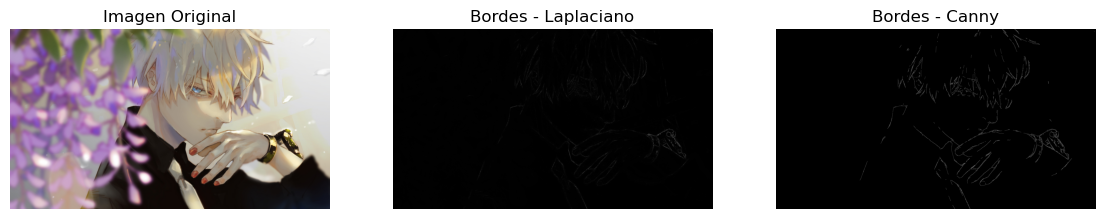

In [86]:
def detectar_bordes_laplaciano(imagen_path):
    # Cargar la imagen en escala de grises
    imagen_gris = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)
    
    # Aplicar el operador Laplaciano
    laplaciano = cv2.Laplacian(imagen_gris, cv2.CV_64F)
    laplaciano = np.uint8(np.absolute(laplaciano))
    
    return laplaciano

def detectar_bordes_canny(imagen_path, umbral_min=100, umbral_max=200):
    # Cargar la imagen en escala de grises
    imagen_gris = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)
    
    # Aplicar el detector de bordes Canny
    bordes_canny = cv2.Canny(imagen_gris, umbral_min, umbral_max)
    
    return bordes_canny

def mostrar_resultados(imagen_path):
    # Cargar la imagen original
    imagen = cv2.imread(imagen_path)
    
    # Detectar bordes con Laplaciano
    bordes_laplaciano = detectar_bordes_laplaciano(imagen_path)
    
    # Detectar bordes con Canny
    bordes_canny = detectar_bordes_canny(imagen_path)
    
    # Mostrar resultados
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(bordes_laplaciano, cmap='gray')
    plt.title('Bordes - Laplaciano')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(bordes_canny, cmap='gray')
    plt.title('Bordes - Canny')
    plt.axis('off')
    
    plt.show()

# Ejemplo de uso
mostrar_resultados('Problema6/e61.jpeg')